In [1]:
# from thesis_toolbox.cluster_tools import get_dust_trajectories
import pandas as pd
from thesis_toolbox.composites.create_composites import detrend_timeseries, select_years_to_composite
from thesis_toolbox.utils import get_locations_CLP
from thesis_toolbox.plot.plot_average_trajectories import plot_trajectories_all_locs, plot_trajectory_height_all_locs

import glob
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from dust import map_terrain_china
import matplotlib.cm as cm
import matplotlib
import dust.plot.plotting as dplot
from thesis_toolbox.plot.tools import add_letter
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator, LogLocator
from matplotlib.colors import BoundaryNorm
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
if 'snakemake' in globals():
    to_file = True
    path='./'
    files = snakemake.input.trajec_files
else:
    path = '../../../'
    to_file= False
    files=glob.glob(path+'results/model_results/trajectories/*.nc')

## Centriod dust loading trajectories 1999-2019

In [45]:
rm_list = ['dust_loading_traj_drydep_20micron_ULANTATAL','dust_loading_traj_drydep_2micron_ULANTATAL', 
           'dust_loading_traj_wetdep_20micron_ULANTATAL', 'dust_loading_traj_wetdep_2micron_ULANTATAL']

    

locs = get_locations_CLP().drop('YINCHUAN').index
locs = ['SHAPOTOU','SACOL','BAODE','LUOCHUAN','LINGTAI','LANTIAN']


dsets={}
for site in locs:
    for ncfile in files:

        temp_file = xr.open_dataset(ncfile)
        key = ncfile.split('/')[-1].split('_')[:6]
        # print(key)
        
        if key[-1] == site:
            key = '_'.join(key)
            dsets[key]=temp_file

for key in rm_list:
    dsets.pop(key, None)

In [46]:
ems_path= path+ 'results/model_results/intermediate_results/emission_flux.china.MAM.1999-2019.nc'
ems_dset=xr.open_dataset(ems_path)

In [47]:
mean_emissions = ems_dset['Emission'].resample(time='Y').sum().mean(dim='time',keep_attrs=True)


In [50]:
locs

['SHAPOTOU', 'SACOL', 'BAODE', 'LUOCHUAN', 'LINGTAI', 'LANTIAN']

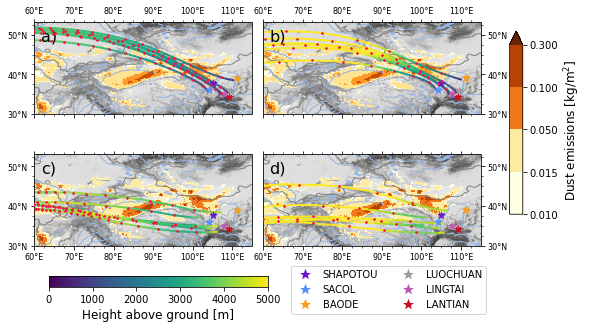

In [57]:
fig = plt.figure(figsize=(8,4.8))
gs = fig.add_gridspec(nrows=5, ncols=2, hspace=0.05,wspace=0.05, height_ratios=[1, 1, 0.2 ,1, 1])

lax = fig.add_subplot(gs[:3,0], projection=ccrs.PlateCarree(), label='lax0')
rax = fig.add_subplot(gs[:3,1],projection=ccrs.PlateCarree(), label='rax0')
norm = BoundaryNorm([0.01,0.015,0.05,0.1,0.3], extend='max', ncolors=5)
cmap = matplotlib.cm.get_cmap('YlOrBr', 5)
mean_emissions.plot.contourf(ax=lax, 
                             cmap=cmap,
                             norm=norm, extend='max' , add_colorbar=False, add_labels=False)
mean_emissions.plot.contourf(ax=rax, 
                             cmap=cmap,
                             norm=norm, extend='max' , add_colorbar=False, add_labels=False)
plot_trajectories_all_locs(dsets,kind='drydep', axes=[lax,rax], vmax=5000,add_letters=False, add_colorbar=False, locs = locs,
                         colors = ['#6c16cc', '#5790fc', '#f89c20', '#9c9ca1', '#ba5bac', '#c41020'])
lax.set_extent([60,115,30,50])
rax.set_extent([60,115,30,50])
lax.set_xticks([60,70, 80, 90, 100, 110])
rax.set_xticks([60,70, 80, 90, 100, 110])
rax.xaxis.set_ticklabels(['60°E','70°E','80°E', '90°E', '100°E', '110°E'], fontsize=8)
lax.xaxis.set_ticklabels(['60°E','70°E','80°E', '90°E', '100°E', '110°E'], fontsize=8)
lax.set_yticks([30, 40, 50])
rax.set_yticks([30, 40, 50])
rax.yaxis.set_ticklabels(['30°N', '40°N', '50°N'], fontsize=8)
lax.yaxis.set_ticklabels(['30°N', '40°N', '50°N'], fontsize=8)
lax.tick_params(axis="x", which='both',bottom=True, top=True, labelbottom=False, labeltop=True)
rax.tick_params(axis="x", which='both', bottom=True, top=True, labelbottom=False, labeltop=True)
rax.yaxis.tick_right()

# vlax = fig.add_subplot(gs[2,0],label='vrax0')
# vrax = fig.add_subplot(gs[2,1],label='vrax0')
# vrax.set_ylabel('Meters')
# vlax.set_ylabel('Meters')
# vlax.set_ylim(200,10000)
# vlax.set_yticks([2500,5000,7500])
# vrax.set_ylim(200,10000)
# vrax.set_yticks([2500,5000,7500])
# vrax.yaxis.tick_right()
# plot_trajectory_height_all_locs(dsets, kind='drydep', axes=[vlax,vrax],add_letters=False, locs = locs)
# vrax.set_xlabel('Time along backward trajectory [h]')
# vlax.set_xlabel('Time along backward trajectory [h]')
# vrax.invert_xaxis()
# vlax.invert_xaxis()
# vrax.yaxis.set_label_position("right")
lax = fig.add_subplot(gs[3:,0], projection=ccrs.PlateCarree())
rax = fig.add_subplot(gs[3:,1],projection=ccrs.PlateCarree())
cmap = matplotlib.cm.get_cmap('YlOrBr', 6)
mean_emissions.plot.contourf(ax=lax, 
                             cmap=cmap,
                             norm=norm, extend='max' , add_colorbar=False, add_labels=False)
cs = mean_emissions.plot.contourf(ax=rax, 
                             cmap=cmap,
                             norm=norm, extend='max' , add_colorbar=False, add_labels=False)
plot_trajectories_all_locs(dsets,kind='wetdep', axes=[lax,rax], vmax=5000,add_letters=False, add_colorbar=False,  locs = locs,
                           colors = ['#6c16cc', '#5790fc', '#f89c20', '#9c9ca1', '#ba5bac', '#c41020'])
lax.tick_params(axis="x", which='both',bottom=True, top=True, labelbottom=True, labeltop=False)
rax.tick_params(axis="x", which='both', bottom=True, top=True, labelbottom=True, labeltop=False)
rax.yaxis.tick_right()
lax.set_extent([60,115,30,50])
rax.set_extent([60,115,30,50])
lax.set_xticks([60,70, 80, 90, 100, 110])
rax.set_xticks([60,70, 80, 90, 100, 110])
lax.set_yticks([30, 40, 50])
rax.set_yticks([30, 40, 50])
rax.yaxis.set_ticklabels(['30°N', '40°N', '50°N'], fontsize=8)
lax.yaxis.set_ticklabels(['30°N', '40°N', '50°N'], fontsize=8)
lax.xaxis.set_ticklabels(['60°E','70°E','80°E', '90°E', '100°E', '110°E'], fontsize=8)
rax.xaxis.set_ticklabels(['60°E','70°E','80°E', '90°E', '100°E', '110°E'], fontsize=8)
# axi.set_xticks([60,70, 80, 90, 100, 110])


# vlax = fig.add_subplot(gs[6,0])
# vrax = fig.add_subplot(gs[6,1])
# vrax.set_ylabel('Meters')
# vlax.set_ylabel('Meters')
# vlax.set_ylim(200,10000)
# vlax.set_yticks([2500,5000,7500])
# vrax.set_ylim(200,10000)
# vrax.set_yticks([2500,5000,7500])
# vrax.yaxis.tick_right()
# plot_trajectory_height_all_locs(dsets, kind='wetdep', axes=[vlax,vrax],add_letters=False,  locs = locs,
#                                colors = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"],)
# # vrax.invert_xaxis()
# vlax.invert_xaxis()
# vrax.set_xlabel('Time along backward trajectory [h]')
# vlax.set_xlabel('Time along backward trajectory [h]')

# vrax.yaxis.set_label_position("right")

axes = np.array(fig.get_axes())
add_letter(axes, y=0.8)
cbar_ax = fig.add_axes([0.15,0.05, 0.38,0.03])
fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0,vmax=5000)), 
                 label='Height above ground [m]',orientation='horizontal',cax=cbar_ax)
cbar_ax2 = fig.add_axes([0.95,0.26,0.023,0.53])
fig.colorbar(cs, cax=cbar_ax2,label= 'Dust emissions [kg/$\mathrm{m}^2$]',extendfrac=0.08)
h, _ = lax.get_legend_handles_labels()


locsdf = get_locations_CLP()
legend_elems = [Line2D([0],[0], marker='*',markerfacecolor=locsdf.loc[site,'color'], label=site, markersize=15, color='w') for site in locs]

fig.legend(handles=legend_elems, bbox_to_anchor=(0.74, 0.042), loc='center',ncol=2)
 
if to_file:
    plt.savefig(snakemake.output.path_map, bbox_inches='tight')

### Vertical profile 

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8.3,3.4), sharex=True)
plot_trajectory_height_all_locs(dsets, kind='drydep', axes=[ax[0,0],ax[0,1]],add_letters=False, locs=locs,
                               colors =['#6c16cc', '#5790fc', '#f89c20', '#9c9ca1', '#ba5bac', '#c41020'])
plot_trajectory_height_all_locs(dsets, kind='wetdep', axes=[ax[1,0],ax[1,1]],add_letters=False,locs=locs,
                               colors=['#6c16cc', '#5790fc', '#f89c20', '#9c9ca1', '#ba5bac', '#c41020'])
h, l = ax[0,0].get_legend_handles_labels()
if 'BADOE' in l:
    l[1] = 'BAODE'
fig.legend(h,l, bbox_to_anchor=(0.99, 0.665), loc='center')
add_letter(ax, y=0.84)
ax[0,1].set_ylim(500,8000)
ax[1,1].set_ylim(2000,8000)
ax[1,0].set_ylim(2000,8000)
ax[0,0].set_ylabel('Meters')
ax[1,0].set_ylabel('Meters')
ax[1,1].set_xlabel('Time along backward trajectory [h]')
ax[1,0].set_xlabel('Time along backward trajectory [h]')
for axes in ax.ravel():
    axes.invert_xaxis()
if to_file:
        
    plt.savefig(snakemake.output.path_vertical_profile, bbox_inches='tight')
